C:\Users\ethan\anaconda3\Lib\site-packages\shapely\predicates.py:540: RuntimeWarning: invalid value encountered in contains
  return lib.contains(a, b, **kwargs)


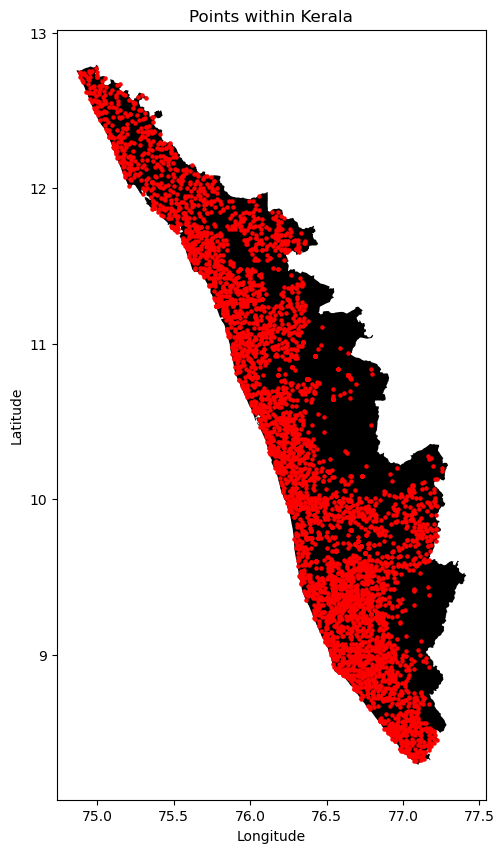

In [10]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Function to clean latitude and longitude
def clean_coordinate(coord_str):
    try:
        return float(coord_str.split()[0])  # Extract numeric part
    except:
        return None  # Handle non-numeric values 
        
# Load data, cleaning Latitude and Longitude columns
df = pd.read_csv(r'C:\Users\ethan\Downloads\clustering_data.csv', 
                 converters={'Latitude': clean_coordinate, 'Longitude': clean_coordinate})

# Filter to keep only points in Kerala
df = df.loc[df['StateName'] == 'KERALA']

# Load Kerala geometry from shapefile
india_map = gpd.read_file(r'C:\Users\ethan\Downloads\archive\India States\Indian_states.shp')
kerala = india_map[india_map['st_nm'] == 'Kerala']  # Adjust this line if the name field is different

# Function to check if a point is within Kerala
def is_within_kerala(row, kerala_geom):
    if row['Latitude'] is not None and row['Longitude'] is not None:
        point = Point(row['Longitude'], row['Latitude'])
        return kerala_geom.contains(point)
    return False

# Applying the function to filter out all points outside Kerala
kerala_geom = kerala.geometry.iloc[0]
df['is_within_kerala'] = df.apply(is_within_kerala, kerala_geom=kerala_geom, axis=1)
df = df[df['is_within_kerala']]

# Plotting
kerala.plot(figsize=(15, 10), color='black')
plt.scatter(df['Longitude'], df['Latitude'], s=5, color='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Points within Kerala')
plt.show()



In [16]:
import numpy as np
from numpy import random

#Defining a class for the K-means algorithm
class KM_alg:
    def __init__(self,k):
        self.k=k
        self.centroids=None

    @staticmethod
    def euclidean_distance(point,centroids):
        return np.sqrt(np.sum((centroids-point)**2,axis=1))

    def fit(self, X ,max_iterations=5000):
        self.centroids = X[random.choice(np.arange(len(X)),size=self.k,replace=False)]

        for j in range(max_iterations):
            y=[]

            for point in X:
                dist=KM_alg.euclidean_distance(point,self.centroids)
                cluster_num=np.argmin(dist)
                y.append(cluster_num)
    
            y=np.array(y)
    
            cluster_indices=[]
    
            for i in range(self.k):
                cluster_indices.append(np.argwhere(y==i))
    
            cluster_centers=[]
    
            for i,indices in enumerate(cluster_indices):
                if len(indices)==0:
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices],axis=0)[0])
    
            if np.max(self.centroids -np.array(cluster_centers))<0.00000001:
                   break
            else:
                self.centroids=np.array(cluster_centers)
        return y



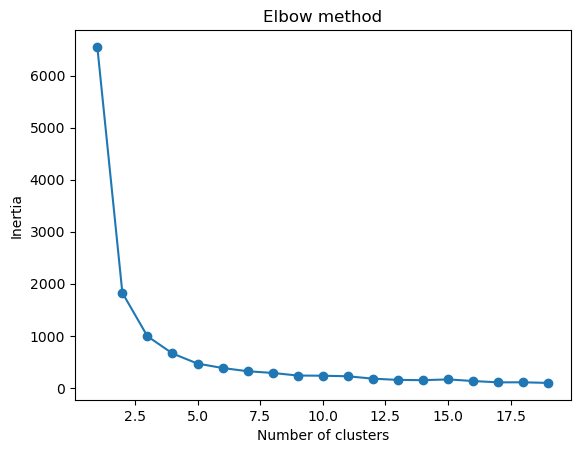

In [26]:

#Plotting the inertias and using ELBOW method to find optimum k


inertia_list = []

for N in range(1,20):

    kmeans = KM_alg(k=N)
    labels=kmeans.fit(L)
    
    df['Cluster']=labels
    
    
    centr=kmeans.centroids
    inertia_k=0
    
    row_count = df.shape[0]
    
    for i in range(row_count):
        clust=df.iloc[i,13]
        inertia_k+=(centr[clust,0]-df.iloc[i,9])**2+(centr[clust,1]-df.iloc[i,10])**2
    
    inertia_list .append(inertia_k)

#plotting elbow plot
plt.plot(range(1,20), inertia_list , marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
   
        

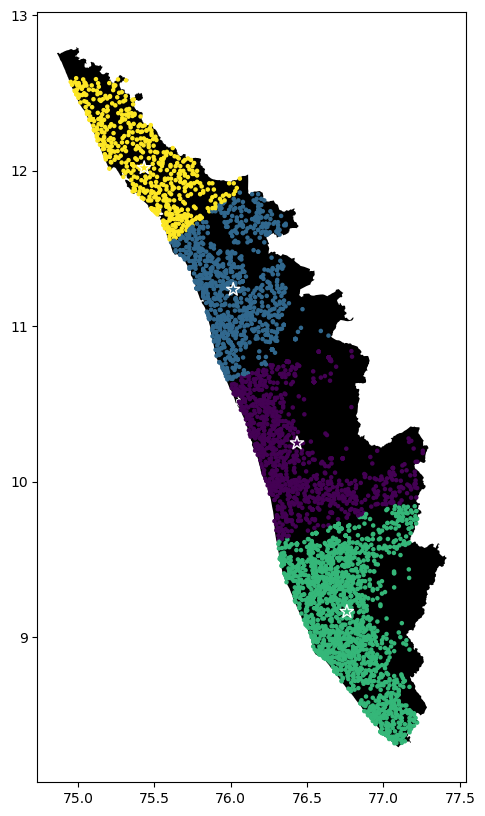

In [32]:
#Clearly we see elbow in the plot at 4 clusters
kmeans=KM_alg(k=4)

df = df[geo_lat_lim& geo_long_lim]
df['INDEX'] = range(1, len(df) + 1)
L=np.array(df.iloc[:,9:11])

L=L.astype('float64') 

#print(L)


#Using the algorithm
labels=kmeans.fit(L)
df['Cluster']=labels


#Plotting the points in the various clusters
kerala.plot(figsize=(15, 10),color='black')

plt.scatter(L[:,1],L[:,0],c=labels,s=5)

plt.scatter(kmeans.centroids[:,1],kmeans.centroids[:,0],c=range(len(kmeans.centroids)),edgecolor='white',marker='*',s=100)